In [2]:
from tensorflow.keras.models import Sequential, load_model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import fashion_mnist, mnist
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()
Y_train = pd.get_dummies(Y_train).values
Y_test = pd.get_dummies(Y_test).values

X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255
X_train = X_train.reshape(-1,28,28,1)
X_test =  X_test.reshape(-1,28,28,1)

In [4]:
np.shape(X_test)

(10000, 28, 28, 1)

In [5]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(64, (3,3),  activation='sigmoid' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),  activation='sigmoid' ))
model.add(Conv2D(128, (3,3),  activation='sigmoid' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])



2022-10-25 18:14:33.847810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 18:14:33.880718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 18:14:33.881013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-25 18:14:33.881874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
mf = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100


2022-10-25 18:14:36.297951: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


1875/1875 - 16s - loss: 0.4197 - accuracy: 0.8483 - val_loss: 0.5448 - val_accuracy: 0.8103 - 16s/epoch - 9ms/step
Epoch 2/100
1875/1875 - 14s - loss: 0.2932 - accuracy: 0.8934 - val_loss: 0.3118 - val_accuracy: 0.8906 - 14s/epoch - 7ms/step
Epoch 3/100
1875/1875 - 14s - loss: 0.2467 - accuracy: 0.9082 - val_loss: 0.2983 - val_accuracy: 0.8939 - 14s/epoch - 7ms/step
Epoch 4/100
1875/1875 - 14s - loss: 0.2136 - accuracy: 0.9214 - val_loss: 0.3338 - val_accuracy: 0.8832 - 14s/epoch - 7ms/step
Epoch 5/100
1875/1875 - 14s - loss: 0.1847 - accuracy: 0.9307 - val_loss: 0.2738 - val_accuracy: 0.8998 - 14s/epoch - 7ms/step
Epoch 6/100
1875/1875 - 14s - loss: 0.1613 - accuracy: 0.9397 - val_loss: 0.2785 - val_accuracy: 0.9054 - 14s/epoch - 7ms/step
Epoch 7/100
1875/1875 - 14s - loss: 0.1399 - accuracy: 0.9480 - val_loss: 0.2790 - val_accuracy: 0.9083 - 14s/epoch - 7ms/step
Epoch 8/100
1875/1875 - 14s - loss: 0.1187 - accuracy: 0.9558 - val_loss: 0.2908 - val_accuracy: 0.9098 - 14s/epoch - 7ms/s

In [7]:
weight = model.get_weights()
np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

/home/pancrackhead/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


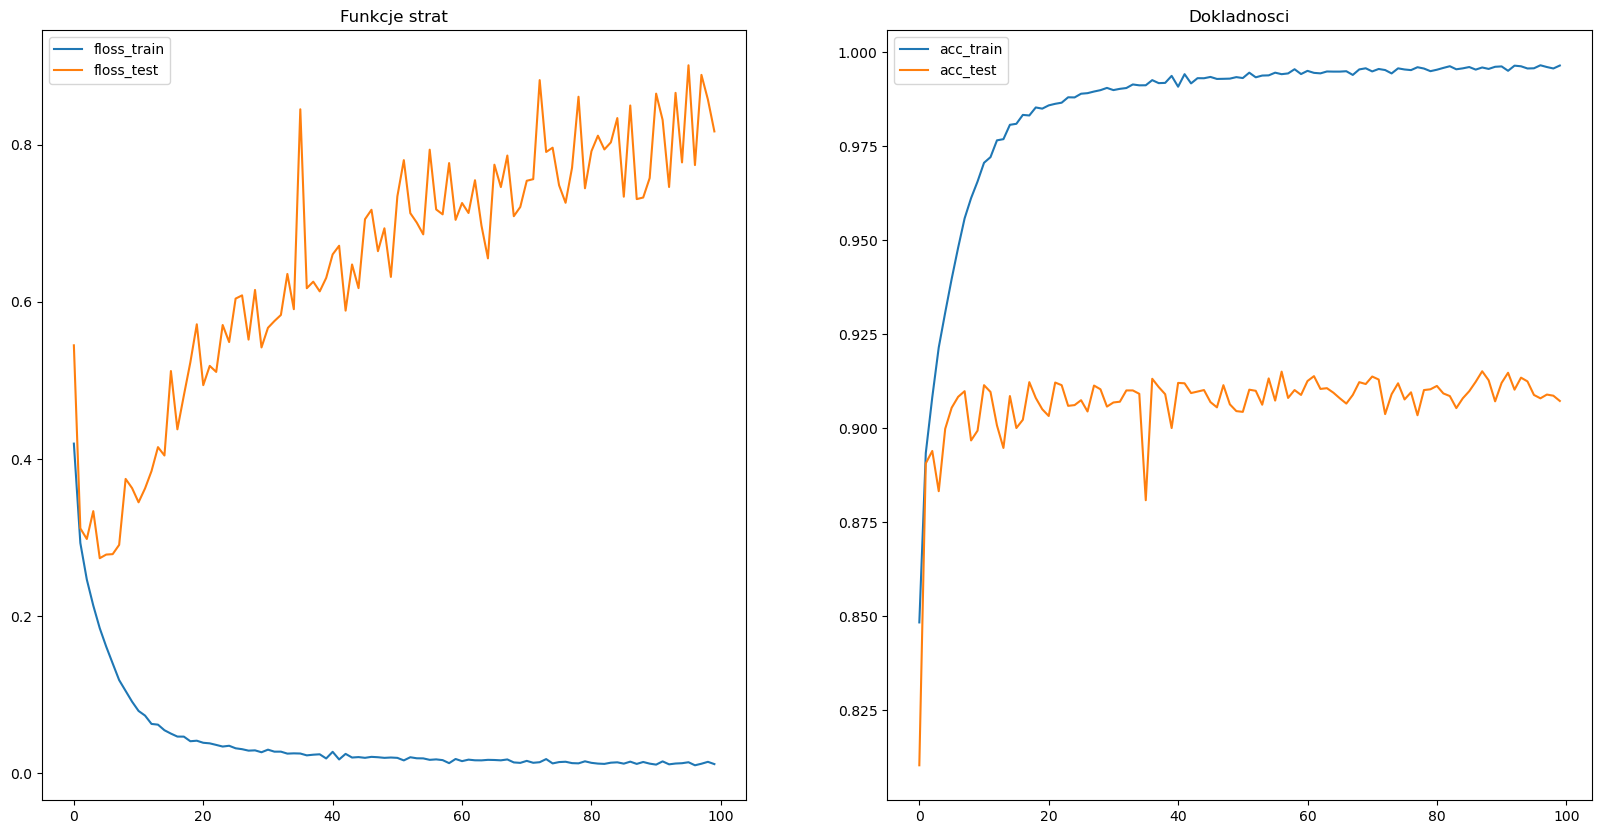

In [11]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 100)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

plt.savefig('accuracy_los_func.png')
plt.show()



In [9]:
acc_test[33]


0.9100000262260437

In [10]:
yt=Y_test.copy()

a=Y_test!=z[6].astype(int)
np.sum(a,axis=1)

NameError: name 'z' is not defined

In [ ]:
out_put = model.predict(X_test)
z=np.zeros((10,10))
for i in range(10):
    z[i,i]+=1 

for i in range(len(z)):
    mask=Y_test!=z[i].astype(int)
    yt[np.sum(mask, axis=1)==0]=i

313/313 [==============================] - 1s 3ms/step


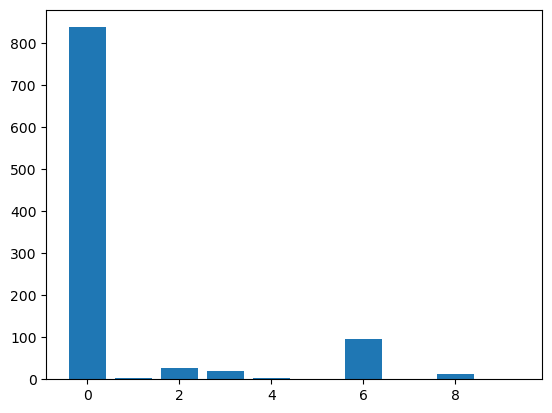

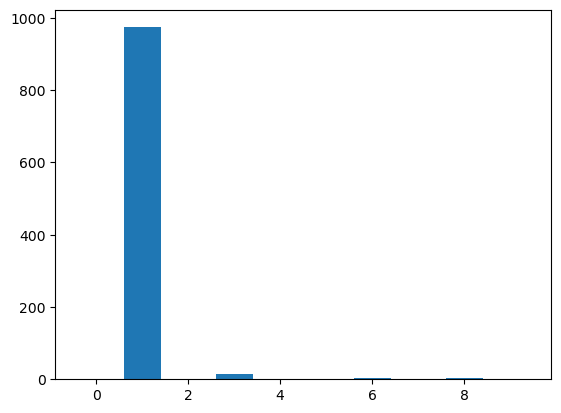

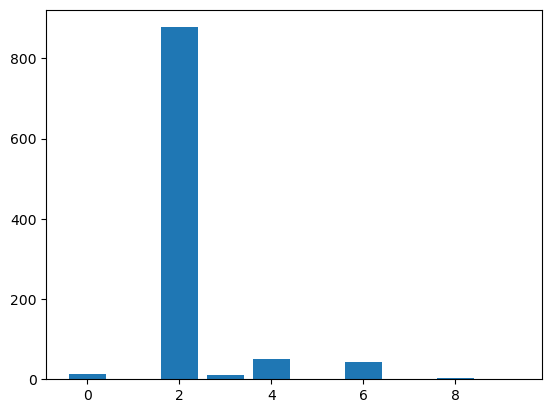

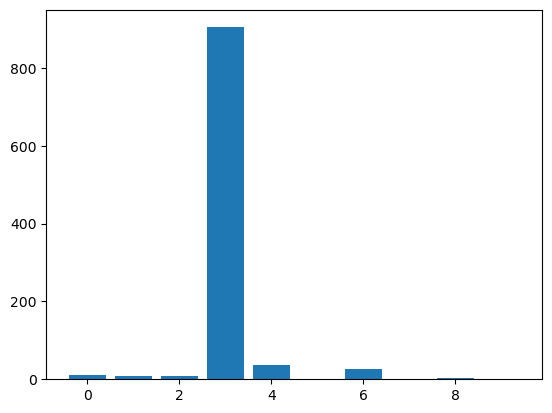

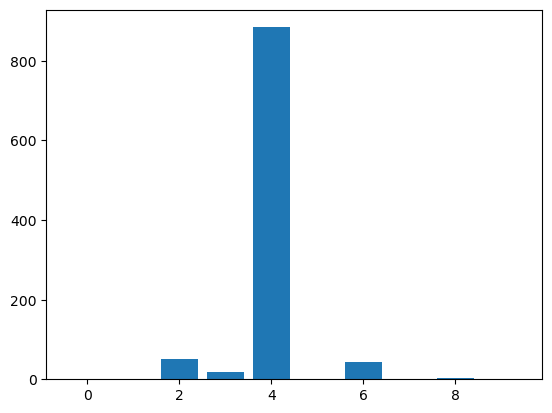

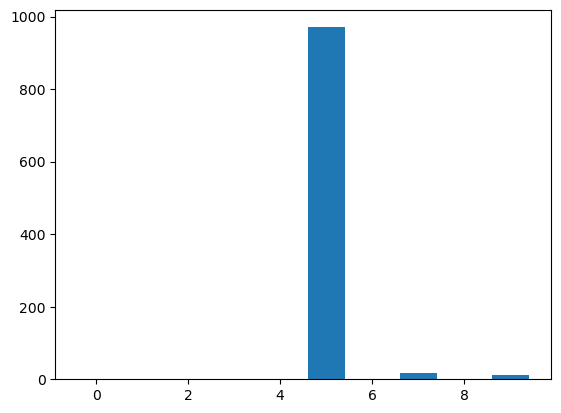

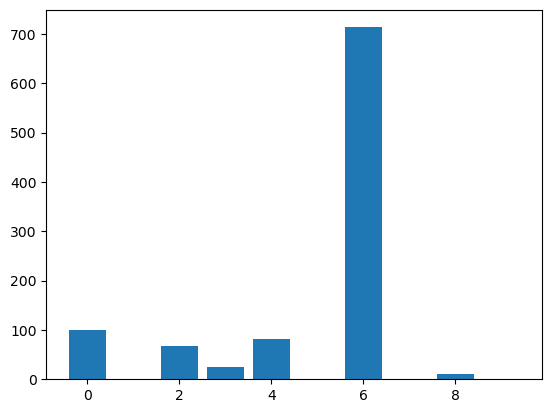

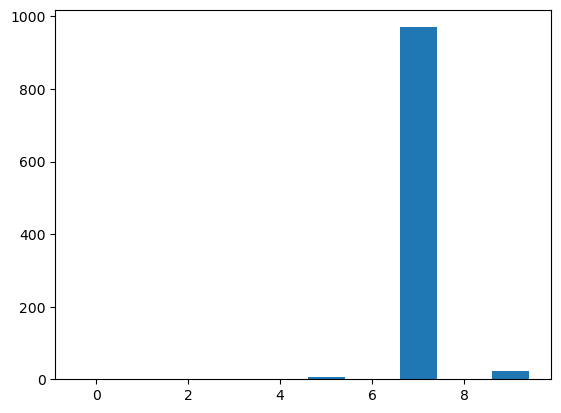

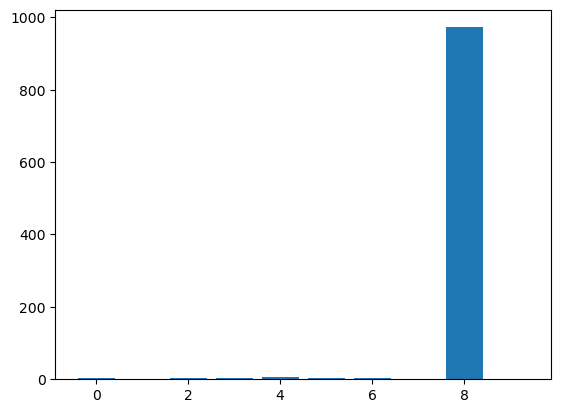

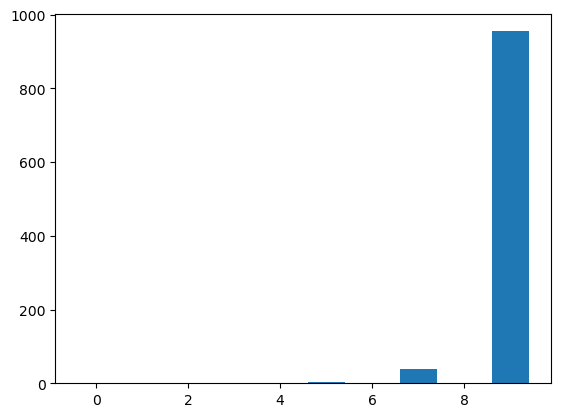

In [ ]:
for i in range(10):
    plt.bar(np.arange(10),np.sum(out_put[yt[:,1]==i], axis=0))
    plt.show()